In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("movie_metadata.csv")

In [3]:
#average rating for director
directors = data.director_name.dropna().unique()
score = data.groupby(["director_name"]).mean()["imdb_score"]

director_df = pd.DataFrame([(i, score[i]) for i in directors], columns=["director", "score"])

top_director = director_df.sort_values(by="score",ascending=False).head(30)

sns.barplot(x="director", y="score", data=top_director)
plt.xticks([i - 0.2 for i in range(len(top_director))], top_director["director"], rotation=90)
plt.ylabel("Average IMDB ratings")
plt.title("Average IMDB ratings for top directors")
plt.tight_layout()
plt.show()


In [4]:
#average rating for actor
actors = data.actor_1_name.dropna().unique()
score = data.groupby(["actor_1_name"]).mean()["imdb_score"]

actor_df = pd.DataFrame([(i, score[i]) for i in actors], columns=["actor", "score"])

top_actors = actor_df.sort_values(by="score",ascending=False).head(30)

sns.barplot(x="actor", y="score", data=top_actors)
plt.xticks([i - 0.2 for i in range(len(top_actors))], top_actors["actor"], rotation=90)
plt.ylabel("Average IMDB ratings")
plt.title("Average IMDB ratings for top actors")
plt.tight_layout()
plt.show()

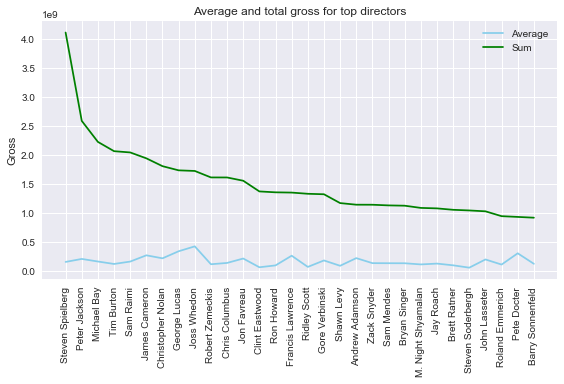

In [5]:
#average earning for director
directors = data.director_name.dropna().unique()
score = data.groupby(["director_name"]).mean()["gross"]
score2 = data.groupby(["director_name"]).sum()["gross"]

director_df = pd.DataFrame([(i, score[i], score2[i]) for i in directors], columns=["director", "Average", "Sum"])

top_director = director_df.sort_values(by="Sum",ascending=False).head(30)

plt.plot( np.arange(len(top_director)), top_director["Average"] , color='skyblue')
plt.plot(np.arange(len(top_director)), top_director["Sum"], color='green')
plt.legend()
plt.xticks(np.arange(len(top_director)), top_director["director"], rotation=90)
plt.ylabel("Gross")
plt.title("Average and total gross for top directors")
plt.tight_layout()
plt.show()

In [6]:
#average earning for actor
actors = data.actor_1_name.dropna().unique()
score = data.groupby(["actor_1_name"]).mean()["gross"]
score2 = data.groupby(["actor_1_name"]).sum()["gross"]

actor_df = pd.DataFrame([(i, score[i], score2[i]) for i in actors], columns=["actor", "Average", "Sum"])

top_actors = actor_df.sort_values(by="Sum",ascending=False).head(30)

plt.plot( np.arange(len(top_actors)), top_actors["Average"] , color='skyblue')
plt.plot(np.arange(len(top_actors)), top_actors["Sum"], color='green')
plt.legend()
plt.xticks(np.arange(len(top_actors)), top_actors["actor"], rotation=90)
plt.ylabel("Gross")
plt.title("Average and total gross for top actors")
plt.tight_layout()
plt.show()

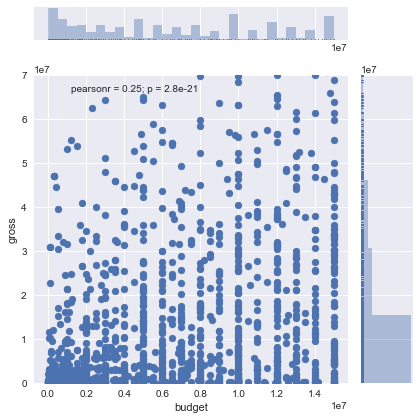

In [11]:
#budget vs gross marginal plot
temp = data.sort_values("budget").head(2000)

#scatter plot with marginal histograms
sns.jointplot(x=temp["budget"], y=temp["gross"], kind='scatter',marginal_kws=dict(bins=30, rug=True))
sns.plt.ylim(0, 70000000)
plt.tight_layout()
sns.plt.show()

#kde plot with marginal density destribution
sns.jointplot(x=temp["budget"], y=temp["gross"], kind='kde')
sns.plt.ylim(0, 70000000)
plt.tight_layout()
sns.plt.show()



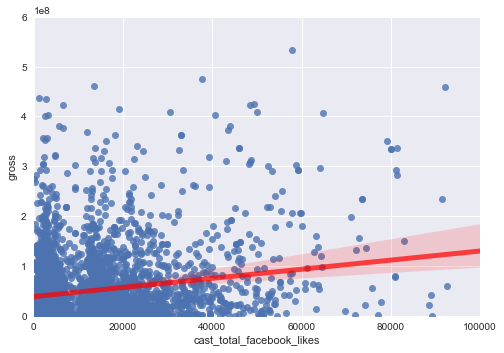

In [12]:
#actor popularity vs gross with regression
sns.regplot(x="cast_total_facebook_likes", y="gross", data=data, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.plt.xlim(0, 100000)
sns.plt.ylim(0, 600000000)
sns.plt.show()


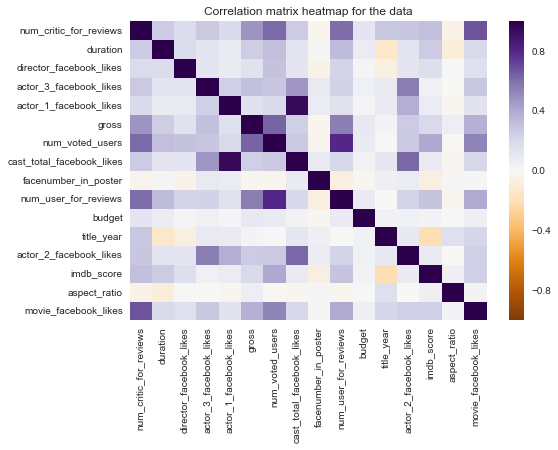

In [13]:
#correlation matrix heat map
corr_matrix=data.corr() 
sns.heatmap(corr_matrix, cmap='PuOr')
plt.title("Correlation matrix heatmap for the data")
sns.plt.show()
